# APPROXIMATE SOLUTION OF THE SCHRÖDINGER EQUATION FOR A SQUARE WELL POTENTIAL - DEMO SOLUTIONS #

## Learning outcomes

After completing these exercises, you will be able to

- describe key aspects of the linear variation method
- apply the linear variational method to obtain approximate solutions of the time-independent Schrödinger equation
- explain the cost to benefit ratio of accuracy versus computational complexity
- demonstrate skills for debugging code designed for scientific applications
- access and modify elements of arrays and/or matrices
- use scipy library functions solve eigenvalue equations
- visualize the solutions of the time-independent Schrödinger equation

## <span style="color:blue"> Pre-lab activities </span>

<span style="color:blue">

Before coming to lab, please complete the following and **turn in your solutions to problems 2 - 7 at the beginning of the lab period**.

1. Read sections 0 through 5. *If you have some background in linear algebra (i.e. you know how to expands the determinant of a matrix or how to calculate a matrix vector product), you may skip section 0.*
2. Provide a concise (3-4 sentence) summary of the basic tenets of the linear variation method.
3. Prove Eq. 2.12.
4. Using the definition of the potential energy matrix element (see Eq. (2.14) or (3.2)), show that $V_{1,2} = -4.24$ eV for the potential given in Eq. (2.1) with $V_0 = 10$ eV. The integral
\begin{equation}
\int {\rm sin}(Ax){\rm sin}(Bx) dx =\frac{1}{2} \left( \frac{{\rm sin} [(A-B)x]}{A-B} - \frac{{\rm sin} [(A+B)x]}{A+B} \right) + C 
\end{equation}
may be useful here.   
6. Show that $\bf c^{(1)}$ and $\bf c^{(2)}$ in Eqs. (2.23) and (2.24) are orthogonal.
7. Suppose you were to use the linear variation method with $N=4$ basis functions $\phi_n$ (where $\phi_n$ are particle in a box eigenfunctions and $1 \leq n \leq 4$) to calculate the ground-state energy for an electron that experiences the potential given in Eq. (2.1). Would you expect that your result for the ground-state energy is above or below the energy in Eq. (2.23)? Would the approximate ground-state energy be above or below the exact ground-state energy?
8. Consider $V(x)$ given at the beginning of section 6. Write down the integral expression(s) you will need to evaluate for computing the matrix element $V_{m,n}$ of the potential energy matrix $\bf V$. Include the appropriate limits of integration and other factors such as $V_1$ and $V_B$. You do not need to solve the integrals, however, you should think about how you would apply your work from section 13 of the "Introduction to programming and Python" exercises to numerically calculate the integrals.
</span>

## 0. Review of useful properties of vectors, matrices, determinants

This section provides a pragmatic review of properties of matrices and vectors. For a more in-depth discussion, please see a textbook on linear algebra.

<br> <center> MATRICES </center> <br>

An $N\times M$ matrix ${\bf A}$ is a 2-dimensional collection of $N\cdot M$ numbers
\begin{equation}
{\bf A} = 
\begin{pmatrix}
A_{1,1} & A_{1,2} & \dots  & A_{1,M} \\
A_{2,1} & A_{2,2} & \dots  & A_{2,M} \\
\vdots & \vdots   & \ddots & \vdots  \\
A_{N,1} & A_{N,2} & \dots  & A_{N,M}
\end{pmatrix}
\end{equation}
The transpose of a matrix (denoted by $^T$) is obtained by interchanging columns and rows. Thus
\begin{equation}
{\bf A}^T = 
\begin{pmatrix}
A_{1,1} & A_{2,1} & \dots  & A_{M,1} \\
A_{1,2} & A_{2,2} & \dots  & A_{M,2} \\
\vdots & \vdots   & \ddots & \vdots  \\
A_{1,N} & A_{2,N} & \dots  & A_{M,N}
\end{pmatrix}
\end{equation}
and the transpose of an $N\times M$ matrix is an $M\times N$ matrix. When $N=M$, the matrix is said to be a square matrix. Furthermore, if ${\bf A} = {\bf A}^{T}$ (i.e. $A_{n,m} = A_{m,n}$) the matrix ${\bf A}$ is said to be symmetric. A square matrix $\bf D$ is said to be diagonal when all off-diagonal elements ($D_{n,m}$ with $n\neq m$) are zero
\begin{equation}
{\bf D} = 
\begin{pmatrix}
D_{1,1} &     0    & \dots   & 0 \\
 0      & D_{2,2}  & \dots   & 0 \\
\vdots  & \vdots   & \ddots  & \vdots  \\
 0      & 0        & \dots   & D_{N,N}
\end{pmatrix}
\end{equation}

The identity matrix $\bf I$ is a special case of a diagonal matrix in which all diagonal elements are equal to 1
\begin{equation}
{\bf I} = 
\begin{pmatrix}
 1      &     0    & \dots   & 0 \\
 0      &     1    & \dots   & 0 \\
\vdots  & \vdots   & \ddots  & \vdots  \\
 0      & 0        & \dots   & 1
\end{pmatrix}
\end{equation}

A matrix $\bf A$ is said to invertible if there exists a matrix ${\bf A}^{-1}$ (called the inverse of ${\bf A}$) such that ${\bf A}^{-1} \bf A = I$. A matrix is invertible if its determinant (see below) does not vanish.

<br> <center> VECTORS </center> <br>

A column vector ${\bf c}$ is a 1-dimensional collection of $N$ numbers
\begin{equation}
{\bf c} = 
\begin{pmatrix}
c_1 \\
c_2 \\
\vdots \\
c_N
\end{pmatrix}
\end{equation}
where $c_i$ is the i$^{\rm th}$ element of the vector. Alternatively, we can view a colum vector as an $N \times 1$ matrix. The transpose of a column vector is a row vector (or a $1\times N$ matrix). The zero vector $\bf 0$ is an array of zeros. 

<br> <center> DOT/SCALAR/INNER PRODUCTS OF VECTORS </center> <br>

The dot product (a.k.a. inner product) of a row vector $\bf a$ with a colum vector $\bf b$ is a scalar
\begin{equation}
{\bf a \cdot b} = 
\begin{pmatrix}
a_1 & a_2 & \dots & a_N
\end{pmatrix}
\begin{pmatrix}
b_1 \\
b_2 \\
\vdots \\
b_N
\end{pmatrix}=
a_1b_1 + a_2b_2 + \dots +a_Nb_N = \sum_{n}^N a_nb_n
\end{equation}
Note that for the dot product to be well-defined, the length of the two vectors must be the same. As an example, the dot product of
\begin{equation}
{\bf a} = 
\begin{pmatrix}
0 & 1 & 2  \\
\end{pmatrix}
\hspace{2cm}
{\bf b} = 
\begin{pmatrix}
3 \\
4 \\
5
\end{pmatrix}
\end{equation}
is
\begin{equation}
{\bf c} = 
\begin{pmatrix}
0 & 1 & 2  \\
\end{pmatrix}
\begin{pmatrix}
3 \\
4 \\
5
\end{pmatrix} =
0 \cdot 3 + 1 \cdot 4 + 3 \cdot 5 = 19
\end{equation}
The norm $\vert\vert {\bf c} \vert \vert $ of a vector $\bf c$ is $\vert\vert {\bf c} \vert \vert = \sqrt{{\bf c \cdot c}}$.

<br> <center> MATRIX VECTOR PRODUCTS </center> <br>

The product of an $N\times M$ matrix $\bf A$ with a $M\times 1$ column vector $\bf b$ is an $N\times 1$ column vector $\bf c$ with elements
\begin{equation}
c_n = \sum_m^M A_{n,m} b_m
\end{equation}
\begin{equation}
{\bf Ab} = 
\begin{pmatrix}
A_{1,1} & A_{1,2} & \dots  & A_{1,M} \\
A_{2,1} & A_{2,2} & \dots  & A_{2,M} \\
\vdots & \vdots   & \ddots & \vdots  \\
\vdots & \vdots   & \ddots & \vdots  \\
A_{N,1} & A_{N,2} & \dots  & A_{N,M}
\end{pmatrix}
\begin{pmatrix}
b_1 \\
b_2 \\
\vdots \\
b_M
\end{pmatrix} =
\begin{pmatrix}
A_{1,1}b_1 + A_{1,2}b_2 + \dots + A_{1,M}b_M \\
A_{2,1}b_1 + A_{2,2}b_2 + \dots + A_{2,M}b_M \\
\vdots \\
\vdots \\
A_{N,1}b_1 + A_{N,2}b_2 + \dots + A_{N,M}b_M
\end{pmatrix} =
\bf{c}
\end{equation}
Note that for the matrix-vector to be well-defined, the length of the vector and the number of columns in the matrix must be the same. Looking at it a different way, the $n^{\rm th}$ element of the vector $\bf c$ is the dot product between the $n^{\rm th}$ row of $\bf A$ and the vector $\bf b$.
As an example, matrix vector product of
\begin{equation}
{\bf A} = 
\begin{pmatrix}
0 & 1  \\
2 & 3  \\
4 & 5
\end{pmatrix}
\hspace{2cm}
{\bf b} = 
\begin{pmatrix}
6  \\
7 
\end{pmatrix}
\end{equation}
is
\begin{equation}
{\bf c} = 
\begin{pmatrix}
0 & 1  \\
2 & 3  \\
4 & 5
\end{pmatrix}
\begin{pmatrix}
6  \\
7 
\end{pmatrix} =
\begin{pmatrix}
0\cdot 6 + 1\cdot 7 \\
2\cdot 6 + 3\cdot 7 \\
4\cdot 6 + 5\cdot 7 \\
\end{pmatrix}=
\begin{pmatrix}
7  \\
33 \\
59
\end{pmatrix}
\end{equation}

<br> <center> MATRIX MATRIX PRODUCTS </center> <br>

The matrix product of an $N\times K$ matrix $\bf A$ and a $K\times M$ matrix $\bf B$ is an $N\times M$ matrix $\bf C$ with elements
\begin{equation}
C_{n,m} = \left( {\bf AB} \right)_{n,m} = \sum_{k=1}^{K} A_{n,k}\cdot B_{k,m}
\end{equation}
Note that for the matrix product to be well-defined, the number of columns in matrix $\bf A$ and the number of rows in matrix $\bf B$ must be the same. 
As an example, the matrix product of 
\begin{equation}
{\bf A} = 
\begin{pmatrix}
0 & 1 \\
2 & 3
\end{pmatrix}
\hspace{2cm}
{\bf B} = 
\begin{pmatrix}
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}
\end{equation}
is given by
\begin{equation}
{\bf C = AB} =
\begin{pmatrix}
0 & 1 \\
2 & 3
\end{pmatrix}
\begin{pmatrix}
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix} =
\begin{pmatrix}
0\cdot 4 + 1\cdot 7 & 0\cdot 5 + 1\cdot 8 & 0\cdot 6 + 1\cdot 9 \\
2\cdot 4 + 3\cdot 7 & 2\cdot 5 + 3\cdot 8 & 2\cdot 6 + 3\cdot 9 \\
\end{pmatrix}=
\begin{pmatrix}
7  &  8 &  9 \\
29 & 34 &  39
\end{pmatrix}
\end{equation}
Matrix products are associative ($\bf A(BC) = (AB)C$), distributive ($\bf A(B+C) = AB + AC$), and in general (though not always) non-commutative ($\bf AB \neq BA$). Note that the identity matrix commutes with any other matrix $\bf IA = AI$ and the product of the identiy matrix with another matrix is the matrix itself ($\bf IA = A$). 

<br> <center> DETERMINANTS </center> <br>

The detemrminant of an $N \times N$ square matrix $\bf A$, denoted ${\rm det} ({\bf A})$ or $\vert {\bf A} \vert$, is a scalar and is the weighted sum of the determinants of the minors of $\bf A$. The minor ${\bf m}_{i,j}$ of $\bf A$ is an $N-1 \times N-1$ matrix obtained by removing the $i^{\rm th}$ row and $j^{\rm th}$ column from $\rm A$. Specifically, for every row $i$ of $\bf A$ the Laplace expansion is
\begin{equation}
\vert {\bf A} \vert = \sum_{i=1}^N \left( -1 \right)^{i+j}A_{i,j}\vert {\bf d}_{i,j} \vert .
\end{equation}
As an example, the determinant of
\begin{equation}
{\bf A} =
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}
\end{equation}
is obtained by choosing the first row ($i=1$) and expanding as
\begin{equation}
\vert {\bf A} = \vert 
\begin{vmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{vmatrix} = 
\left( -1 \right)^{1+1} \cdot 1 \cdot \begin{vmatrix} 5 & 6 \\ 8 & 9 \end{vmatrix} + \left( -1 \right)^{1+2} \cdot 2 \cdot \begin{vmatrix} 4 & 6 \\ 7 & 9 \end{vmatrix} + \left( -1 \right)^{1+3} \cdot 3 \cdot \begin{vmatrix} 4 & 5 \\ 7 & 8 \end{vmatrix} = 1 \cdot \begin{vmatrix} 5 & 6 \\ 8 & 9 \end{vmatrix} - 2 \cdot \begin{vmatrix} 4 & 6 \\ 7 & 9 \end{vmatrix} + 3 \cdot \begin{vmatrix} 4 & 5 \\ 7 & 8 \end{vmatrix}  
\end{equation}
Next, we expand the remaining determinants to get the final result
\begin{equation}
\vert {\bf A} \vert = 
1 \cdot \begin{vmatrix} 5 & 6 \\ 8 & 9 \end{vmatrix} - 2 \cdot \begin{vmatrix} 4 & 6 \\ 7 & 9 \end{vmatrix} + 3 \cdot \begin{vmatrix} 4 & 5 \\ 7 & 8 \end{vmatrix} = 
1 \cdot \left( 5 \cdot 9 - 6 \cdot 8 \right) -2 \cdot \left( 4 \cdot 9 - 6 \cdot 7 \right) + 3 \cdot \left( 4 \cdot 8 - 5 \cdot 7 \right) = 0
\end{equation}

Note that we get the same result if we expand along any of the rows or any of the columns. Furthermore, the sign of the determinant changes if one interchanges any two rows or any two columns. The determinant of a product of two matrices $\bf A$ and $\bf B$ is the product of the determinants of the matrices; $\vert {\bf AB}\vert = \vert {\bf A}\vert \cdot \vert {\bf B}\vert$. Lastly, the determinant of a diagonalizable matrix $\bf A$ is equal to the product of the eigenvalues $\{ e_n \}$; $\vert {\bf A} \vert = \Pi_n e_n$.



## 1. Overview of the linear variation method

Analytical solutions to the time-independent Schrödinger equation
\begin{equation}
\hat{H} \psi = E \psi
\tag{1.1}
\end{equation}
are known for a select few model problems (e.g. particle in a 1-D/2-D/3-D box, harmonic oscillator, particle on a ring/sphere, hydrogen atom and one-electron ions), and most problems encountered in quantum chemistry necessitate that we make some sort of approximation when solving the time-independent Schrödinger equation. 

One such approximation method, called the *linear variational method*, expresses the wave function $\psi$ as a *linear combination* of *basis functions* $\{ \phi_n \}$
\begin{equation}
\psi = \sum_{n=1}^{N} c_n \phi_n
\tag{1.2}
\end{equation}
with *constant coefficients* $\{ c_n \}$. Put "simply", the basis functions are used to describe the wave function, and the importance of a basis function $\phi_n$ in this description is proportional to the magnitude of the coefficient $c_n$. For pratical reasons, the number of basis functions $N$ is finite; thus, the wave function in Eq. (1.2) is, in general, approximate. Because the wave function depends on the coefficients, the energy also depends on the coefficients. Thus, to find the ground-state solution to the time-independent Schrödinger equation, our task is to determine the set of coefficients that minimize the energy. Once we find the optimal set of normalized coefficients, we can express the wave function as in Eq. (1.2) and calculate the approximate energy as $E_{approx}=\int \psi^* \hat{H} \psi {\rm d}\tau$ and other expectation values of interest. For the ground state (and in some cases excited states) one can prove that the approximate energy is guaranteed to be an *upper bound* to the exact energy (i.e. $E_{approx} \geq E_{exact}$ the approximate energy approaches the exact energy from above as the number of basis functions increases).

In section 2, we present use a "simple" problem to demonstrate the application of the linear variation method. During this discussion, we highlight concepts such as the matrix representation of the Hamiltonian, matrix form of the time-independent Schrödinger equation, eigenvalues, eigenvectors, and matrix diagonalization. Section 3 presents the general approach to applying the linear variation method. Sections 4 and 5 are provide more details on atomic units and matrix diagonalization in Python.

## 2. A "simple" example to demonstrate the application of the linear variation method

To simplify notation, we will **assume that the coefficients, basis functions, and hence the wave function are real** for the remainder of this section. In most numerical applications, this turns out to be the case. Suppose we are interested in solving the time-independent Schrödinger equation (Eq. (1.1)) for an electron that experiences the potential
\begin{equation}
V(x) = \begin{cases}
 0 \hspace{2.1cm} 0 \leq x \leq L/2 \\
 \\
 V_0 \hspace{2cm} L/2 \leq x \leq L \\
 \\
 \infty \hspace{2cm} \text{everywhere else}
\end{cases} \tag{2.1}
\end{equation}

This potential effectively confines the particle to $0 \leq x \leq L$ and the electron experiences a higher potential in the right half of the box. Although the potential looks deceptively simple, the analytical solutions to Eq. (1.1) are not known. Below, we present a detailed discussion of obtaining the approximate solutions using the linear variation method.

To start, we select a set of basis functions. Because the potential in Eq. (2.1) is similar to the particle in a 1-D particle in a box potential, we will choose the eigenfunctions of the particle in a 1-D box Hamiltonian
\begin{equation}
\phi_n(x) = \sqrt\frac{2}{L}{\rm sin}\left( \frac{n\pi x}{L}\right)
\tag{2.2}
\end{equation}
as our basis functions. Although other choices are also possible (as long as they obey the right boundary conditions), the basis functions in Eq. (2.2) are convenient since they are orthonnormal (you showed this in section 13 of the "Introduction to programming and Python" exercises) on the domain $0 \leq x \leq L$. That is,

\begin{equation}
\int_0^L \phi_n(x)^*  \phi_m(x) {\rm d}x = \delta_{m,n}
\tag{2.3}
\end{equation}

where the Kroenecker delta function $\delta_{m,n}$ is defined as 

\begin{equation}
\delta_{n,m}= \begin{cases}
 0 \hspace{2.0cm} n \neq  m\\
 \\
 1 \hspace{2cm} n = m\\
\end{cases}. 
\end{equation}

Having chosen the basis set, we need to decide how many basis functions to consider when describing the wave function. For simplicity, we will use two functions ($N=2$), and thus our wave function has the form
\begin{equation}
\psi(x) = c_1 \phi_1(x) + c_2 \phi_2(x) .
\tag{2.4}
\end{equation}

To determine the equations for the coefficients that minimize the energy, we first multiply Eq. 1.1 from the left by $\psi(x)^*$ and integrate
\begin{equation}
\int_{0}^{L} \psi(x)^* \hat{H} \psi(x) dx = E \int_{0}^L \psi(x)^* \psi(x) dx
\tag{2.5}
\end{equation}
Note that we did not assume that the $\psi$ is normalized and kept the integral on the right hand side. Inserting Eq. (2.4) into Eq. (2.5), recognizing that the basis functions are orthonormal (as in E2. (2.3)), and assuming that the coefficients are real, we have
\begin{equation}
H_{1,1}c_1^2 + H_{1,2} c_1c_2 + H_{2,1}c_1c_2 + H_{2,2}c_2^2 = E \left ( c_1^2 + c_2^2\right),
\tag{2.6}
\end{equation}
where the Hamiltonian matrix element $H_{n,m}$ is defined as
\begin{equation}
H_{n,m} = \int_{0}^L \phi_n(x) \hat{H} \phi_m(x){\rm d}x .
\tag{2.7}
\end{equation}
Note that $H_{n,m}$ is independent of the coefficients and can be evaluated once the form of $\hat{H}$ and $\phi_m$ are known. 
Finally, since the energy is stationary with respect to variations in the coefficients $\left( \text{i.e.} \frac{\partial E}{\partial c_1} = \frac{\partial  E}{\partial c_2} = 0\right) $ at the minimum, differentiating Eq. (2.6) with respect to $c_1$ and $c_2$ and recognizing that $H_{1,2} = H_{2,1}$ gives the two equations
\begin{equation}
H_{1,1} c_1 + H_{1,2}c_2 = Ec_1 
\tag{2.8a}
\end{equation}
\begin{equation}
H_{2,1} c_1 + H_{2,2}c_2 = Ec_2 
\tag{2.8b}
\end{equation}
In principle, one could solve this system of two equations by substitution, to get a quadratic equation for the energy $E$. Once the two roots are found, the coefficients corresponding to each root can be found from Eqs. (2.8a) and (2.8b).

However, this process becomes impractical very quickly for $N>2$ and we take a different approach. Notice that we can succinctly represent Eqs. (2.8a) and (2.8b) as one *matrix equation*

\begin{equation}
\begin{pmatrix}
H_{1,1} & H_{1,2} \\
H_{2,1} & H_{2,2} \\
\end{pmatrix}
\begin{pmatrix}
c_1 \\
c_2
\end{pmatrix}
= E
\begin{pmatrix}
c_1 \\
c_2
\end{pmatrix}
\iff {\bf H}{\bf c} = E{\bf c}
\tag{2.9} 
\end{equation}
Equation (2.9) is referred to as the *matrix form* of the time-independent Schrödinger equation in an orthonormal basis and $\bf H$ is called the matrix representation of the Hamiltonian (or Hamiltonian matrix for short) in the chosen basis set. The vector ${\bf c}$ contains the expansion coefficients and is referred to as the eigenvector of ${\bf H}$. $E$ is the eigenvalue that corresponds to the eigenvector ${\bf c}$. Collectively, ${\bf c}$ and $E$ are called an eigenpair.

Now, to solve for the coefficients, we multiply the right side of Eq. (2.9) by the identity matrix ${\bf I} = \begin{pmatrix} 1 & 0 \\ 0 & 1\end{pmatrix}$ and subtract the result from both sides to give
\begin{equation}
\left( {\bf H} - E{\bf I} \right) {\bf c} = {\bf 0}
\tag{2.10}
\end{equation}
The trivial solution ${\bf c} = {\bf 0} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$ is not interesting since it implies that $\psi = 0$. The more interesting solution is obtained by considering properties of ${\bf H} - E{\bf I}$. If it is invertible $\left( \text{i.e.} \left( {\bf H} - E{\bf I}\right)^{-1} \left({\bf H} - E{\bf I}\right) = {\bf I} \right)$, multiplying Eq. (2.10) from the left by $\left({\bf H} - E{\bf I}\right)^{-1}$ implies that $\bf c = 0$
\begin{equation}
\left( {\bf H} - E{\bf I}\right)^{-1} \left({\bf H} - E{\bf I}\right) {\bf c} = \left( {\bf H} - E{\bf I}\right)^{-1} {\bf 0} \hspace{1cm}\Rightarrow\hspace{1cm} {\bf I}{\bf c} = {\bf 0} \hspace{1cm}\Rightarrow\hspace{1cm}  {\bf c} = {\bf 0}
\end{equation}
Thus, the inverse of ${\bf H} - E{\bf I}$ must not exist for non-trivial solutions (i.e. ${\bf c} \neq {\bf 0}$). This condition is met, if the determinant of ${\bf H} - E{\bf I}$ vanishes
\begin{equation}
\vert {\bf H} - E{\bf I} \vert = 0
\tag{2.11}
\end{equation}

Expanding the determinant and solving for the roots of the resulting polynomial gives the eigenvalues of ${\bf H}$. Then, for each eigenvalue, we can determine the associated eigvector ${\bf}$ from Eq. (2.9). 

To demonstrate this process, we first calculate the Hamiltonian matrix elements using Eqs (2.1), (2.2), and (2.7). Since the Hamiltonian operator is the sum of the kinetic energy operator ($\hat{T}_x$) and the potential energy opertor, the matrix representation of the Hamiltonian is $\bf H = T + V$. Since the basis functions in Eq. (2.2) are orthonormal eigenfunctions of the particle in a 1-D box Hamiltonian (for which $\hat{H} = \hat{T}_x = - \frac{\hbar^2}{2m}\frac{d^2}{dx^2}$) operator, the elements of the kinetic energy matrix are 
\begin{equation}
T_{n,m} = m^2 \left(\frac{\hbar^2\pi^2}{2m_eL^2}\right) \delta_{n,m}.
\tag{2.12}
\end{equation}

Since the value of the Kroenecker delta function $\delta_{n,m}$ vanishes unless $n=m$ and is equal to 1 when $n=m$, we see that $\bf T$ is a diagonal matrix. For an electron with mass $m_e$ in a box of width $L=1$ $\pu{\mathring{A}}$, $ \left(\frac{\hbar^2\pi^2}{2m_eL^2}\right) = 37.6$ eV, and thus, $\bf T$ (in units of eV) has the form
\begin{equation}
{ \bf T} =
\begin{pmatrix}
37.6 & 0 \\
0  & 150.4
\end{pmatrix}
\tag{2.13}
\end{equation}
Now, since $V(x)=0$ for $0\leq x \leq L/2$ and $V = V_0$ for $L/2 \leq x \leq L$, the potential energy matrix element
\begin{equation}
V_{n,m} = \int_0^L \phi_n(x)\hat{V}(x)\phi_m(x) {\rm d}x = \int_{L/2}^L \phi_n(x)V_0\phi_m(x) {\rm d}x = V_0\int_{L/2}^L \phi_n(x)\phi_m(x) {\rm d}x
\tag{2.14}
\end{equation}
requires that we evaluate the integral in Eq. (2.14). For this case, this can be done by hand, however, one needs to use numerical integration techniques for the general case. For  $V_0 = 10$ eV, the potential energy (in units of eV) is
\begin{equation}
{ \bf V} =
\begin{pmatrix}
5.0 & -4.24 \\
-4.24  & 5.0
\end{pmatrix}
\tag{2.15}
\end{equation}
Thus, the Hamiltonian matrix is
\begin{equation}
{ \bf H} =
\begin{pmatrix}
42.6 & -4.24 \\
-4.24 & 155.4
\end{pmatrix}
\tag{2.16}
\end{equation}
and hence ${\bf H} - E {\bf I}$ is given by
\begin{equation}
{ \bf H} - E{\bf I} =
\begin{pmatrix}
42.6 & -4.24 \\
-4.24 & 155.4
\end{pmatrix}
- E
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
= \begin{pmatrix}
42.6 - E & -4.24 \\
-4.24 & 155.4 - E 
\end{pmatrix}
\tag{2.17}
\end{equation}
To find the eigenvalues $E$, we expand the determinant
\begin{equation}
\vert {\bf H} - E{\bf I} \vert = 0
\hspace{0.5cm}\Rightarrow\hspace{0.5cm}
\begin{vmatrix}
42.6 -E & -4.24 \\
-4.24 & 155.4 - E
\end{vmatrix} =0
\hspace{0.5cm}\Rightarrow\hspace{0.5cm}
(42.6 - E)(155.4 - E) - (-4.24)^2 = 0
\hspace{0.5cm}\Rightarrow\hspace{0.5cm}
E^2 - 198.0 E + 6602.1 = 0
\tag{2.18}
\end{equation}
and solve for the roots of the quadratic equation; the two solutions (in units of eV) are $E^{(1)} = 42.441$ and $E^{(2)} = 155.56$. These are the eigenvalues of the Hamiltonian matrix and correspond to the allowed energies for an electron that experiences the potential given in Eq. (2.1).

Lastly, we use these eigenvalues to determine the eigenvectors of ${\bf H}$. First, we insert $E^{(1)} = 42.441$ into the matrix form of the Schrödinger equation as in Eq. (2.9) with the Hamiltonian given in Eq. (2.16)

\begin{equation}
\begin{pmatrix}
42.6 & -4.24 \\
-4.24 & 155.4 
\end{pmatrix}
\begin{pmatrix}
c_1^{(1)} \\ c_2^{(1)}
\end{pmatrix} 
= 42.441
\begin{pmatrix}
c_1^{(1)} \\ c_2^{(1)}
\end{pmatrix}
\hspace{0.5cm}\Rightarrow\hspace{0.5cm}
\begin{pmatrix}
42.6 c_1^{(1)}  -  4.24 c_2^{(1)} \\
-4.24 c_1^{(1)} + 155.4 c_2^{(1)} 
\end{pmatrix}=
\begin{pmatrix}
42.441 c_1^{(1)} \\ 42.441 c_2^{(1)}
\end{pmatrix}
\tag{2.19}
\end{equation}
Eq. (2.19) is equivalent two equations, the first one being $42.6 c^{(1)}_1  -  4.24 c_2^{(1)} = 42.441 c_1^{(1)}$. Solving for $c_1^{(1)}$ in terms of $c_2^{(1)}$, we get 
\begin{equation}
c_1^{(1)} = 26.667 c_2^{(1)}
\tag{2.20}
\end{equation}
Since the basis functions $\phi_1(x)$ and $\phi_2(x)$ are orthonormal (see Eq. (2.3)), one can show that for a normalized wave function $\int_0^L \vert \psi(x)  \vert^2 {\rm d}x = 1$, the coefficients $c_1^{(1)}$ and $c_2^{(1)}$ are related by
\begin{equation}
\left(c_1^{(1)}\right)^2 + \left(c_2^{(1)}\right)^2 = 1
\tag{2.21}
\end{equation}
Inserting Eq. (2.19) into Eq. (2.21) gives
\begin{equation}
\left( 3.65833 c_2^{(1)} \right)^2 + \left(c_2^{(1)}\right)^2 = 1
\hspace{0.5cm}\Rightarrow\hspace{0.5cm}
\left( c_2^{(1)}\right) ^2 = 1.404\times10^{-3} 
\hspace{0.5cm}\Rightarrow\hspace{0.5cm}
c_2^{(1)} = \pm 0.03747 
\tag{2.22}
\end{equation}
Because it is the relative sign of $c_1^{(1)}$ and $c_2^{(1)}$ that matters, we can pick either solution in Eq. (2.22). Using the positive solution, we get $c_1^{(1)} = 0.99860$. Thus, the first eigenpair is given by
\begin{equation}
E^{(1)}=42.441 \hspace{1cm}\&\hspace{1cm} {\bf c}^{(1)} = 
\begin{pmatrix}
0.99860 \\ 0.03747
\end{pmatrix}
\hspace{1cm}\Rightarrow\hspace{1cm} \psi^{(1)}(x) = 0.99860\cdot \phi_1(x) + 0.03747\cdot \phi_2(x)
\tag{2.23}
\end{equation}
Using similar logic, we get the second eigenpair
\begin{equation}
E^{(2)}=155.56 \hspace{1cm}\&\hspace{1cm} {\bf c}^{(2)} = 
\begin{pmatrix}
- 0.03747 \\  0.99860
\end{pmatrix}
\hspace{1cm}\Rightarrow\hspace{1cm} \psi^{(2)}(x) = - 0.03747\cdot \phi_1(x) + 0.99860\cdot \phi_2(x)
\tag{2.24}
\end{equation}

Inspection of the Hamiltonian matrix in Eq. (2.16) reveals that it is symmetric since $H_{1,2} = H_{2,1}$. In general, Hamiltonian matrices with real elements are always symmetric and $H_{m,n} = H_{n,m}$. As it turns out, finding the eigenvectors of a matrix is equivalent to diagonalizing a matrix. Diagonalization is defined as finding the similarity transformation matrix ${\bf P}$ that converts the matrix $\bf A$ to a diagonal matrix ${\bf D} = {\bf P}^T {\bf A}{\bf P}$ where the columns of $\bf P$ correspond to the eigenvectors of the matrix $\bf A$ and $^T$ denotes the transpose (obtained by interchanging colum and row indeces) of a matrix. To demonstrate this, using the two eigenvectors found in Eqs. (2.23) and (2.24), we have
\begin{equation}
{\bf P} =  
\begin{pmatrix} {\bf c}^{(1)} & {\bf c}^{(2)} \end{pmatrix} = 
\begin{pmatrix}
0.99860 & - 0.03747 \\
0.03747 &   0.99860
\end{pmatrix}
\hspace{1cm}\Rightarrow\hspace{1cm} 
{\bf P}^T =
\begin{pmatrix}
  0.99860 &   0.03747 \\
- 0.03747 &   0.99860
\end{pmatrix}
\end{equation}

For the Hamiltonian in Eq. (2.16) we see that
\begin{eqnarray}
{\bf D} = {\bf P}^T{\bf H}{\bf P} &=&
\begin{pmatrix}
  0.99860 &   0.03747 \\
- 0.03747 &   0.99860
\end{pmatrix}
\begin{pmatrix}
  42.6 & -4.24 \\
-4.24 &  155.4 
\end{pmatrix}
\begin{pmatrix}
0.99860 & - 0.03747 \\
0.03747 &   0.99860
\end{pmatrix}
\\
&=&
\begin{pmatrix}
  0.99860 &   0.03747 \\
- 0.03747 &   0.99860
\end{pmatrix}
\begin{pmatrix}
42.382 & -5.830 \\
1.589 &  155.34
\end{pmatrix} 
\\
&=&
\begin{pmatrix}
42.382 &  -0.001 \\
 -0.001 & 155.34
\end{pmatrix} 
\end{eqnarray}

As demonstrated in the cell below (go ahead, and run the code yourself), the fact that the off-diagonal elements of the above matrix are not exactly zero and that the diagonal elements are slightly different from the eigenvalues of ${\bf H}$ *is the result of rounding*. Nonetheless, this example demonstrates that finding the matrix $\bf P$ that brings $\bf H$ to diagonal form is equivalent to finding the eigenvalues and eigenvectors or $\bf H$. 

In [ ]:
import numpy as np
import scipy as sp

def ratio_value(H_11,H_12,E):
    return H_12/(E-H_11)

def c2_value(ratio):
    return np.sqrt(1.0/(1.0+ratio**2))

def c1_value(ratio,c2):
    return ratio * c2

def root_value(a,b,c,root):
    print(a*root**2+b*root+c)

# H matrix elements
H_11 = 42.6
H_12 = -4.24
H_22 = 155.4

# coefficients in quadratic equation
a    = 1.0
b    = -(H_11+H_22)
c    = +H_11*H_22-(H_12**2)

# roots of quadratic equation
E1   = ( - b - np.sqrt(b**2 - 4.0*a*c) ) / ( 2.0 * a )
E2   = ( - b + np.sqrt(b**2 - 4.0*a*c) ) / ( 2.0 * a )

print("")
# solve for coefficients for eigenvalue E1
ratio_1 = ratio_value(H_11,H_12,E1)
c_21    = c2_value(ratio_1)
c_11    = c1_value(ratio_1,c_21)
print(F'E1={E1:12.8f} c_1={c_11:12.8f} c_2={c_21:12.8f}')

# solve for coefficients for eigenvalue E2
ratio_2 = ratio_value(H_11,H_12,E2)
c_22    = c2_value(ratio_2)
c_12    = c1_value(ratio_2,c_22)
print(F'E2={E2:12.8f} c_1={c_12:12.8f} c_2={c_22:12.8f}')

# define Hamiltonian matrix
H = [[H_11,H_12],[H_12,H_22]]
# construct similarity transformation matrix P 
P = [ [c_11 , c_12] , [c_21 , c_22] ]
print("")
print("P = ")
print(P)

#bring Hamiltonian to diagonal form
print("")
print("P^T H P =")
print(np.matmul(np.transpose(P),np.matmul(H,P)))

# much much easier to do with Python's diagonalization routine
eig,vec = sp.linalg.eig(H)

print("")
print("eigenvalues after diagonalization")
print(np.real(eig))

print("")
print("eigenvectors after diagonalization (note that overall phases might differ from the ones above)")
print(vec)

## 3. General approach to using the linear variation method

To obtain approximate solutions to the time-indpendent Schrödinger equation within the framework of the linear variation method, one can follow the following steps.

1. Select a basis set $\{\phi_n\}$ and determine the number of basis functions ($N$) to include in the calculation.
   - The basis functions should obey the appropriate boundary conditions
   - Although the basis functions do not necessarily have to be orthonormal, it helps when they are.
\begin{equation}
\int_\text{all space} \phi_n^*  \phi_m {\rm d}\tau = \delta_{m,n}
\end{equation}

<br>

2. Calculate the matrix representation of Hamiltonian (an $N\times N$ matrix). In the case of an orthonormal basis, the matrix form of the time-independent Schrödinger equation is ${\bf Hc} = E {\bf c}$.
   - Since the Hamiltonian is the sum of the kinetic ($\hat{T}$) and potential ($\hat{V}$) energy operators, computing the matrix representation the kinetic ($\bf T$) and potential ($\bf V$) energy matrices separately helps organize and debug your code.
   - The kinetic energy matrix elements are given by
\begin{equation}
T_{n,m} = \int_\text{ all space} \phi_n^* \hat{T} \phi_m {\rm d}\tau
\tag{3.1}
\end{equation}
   - The potential energy matrix elements are given by
\begin{equation}
V_{n,m} = \int_\text{all space} \phi_n^* \hat{V} \phi_m {\rm d}\tau
\tag{3.2}
\end{equation}
   - Depending on the operator and the basis set, these integrals may be simplified. If they cannot, one can (hopefully) use some numerical integration and/or differentiation technique.
     
<br>

3. Diagonalize the Hamiltonian to obtain the eigenvalues (approximate energies) and eigenvectors (expansion coefficients). There will be $N$ eigenvalues $\{ E^{(n)}\}$ and $N$ eigenvectors $\{ {\bf c}^{(n)}\}$ (column vectors). Generally, the eigenvectors after diagonalization are orthonormal

\begin{equation}
\left({\bf c}^{(n)}\right)^T \cdot {\bf c}^{(m)} = \delta_{m,n} 
\end{equation}

4. Using the expansion coefficients, the approximate wave function $\psi^{(n)}$ corresponding to eigenvalue $E^{(n)}$ 
\begin{equation}
\psi^{(n)} = \sum_{i=1}^{N} c_i^{(n)} \phi_i
\end{equation}
can be used to calculate properties of the system.

## 4. A note on atomic units

Because expressing properties (e.g. energies and distances) of atomic systems is quite cumbersome in SI units, most calculations on the atomic scale use *atomic units*. In atomic units,
\begin{equation}
m_e = e = 4\pi\varepsilon_0 = \hbar = a_0 = E_h = 1,
\end{equation}
where $1 \hspace{1mm} a_0 = \frac{4\pi\varepsilon_0 \hbar^2}{m_ee^2}=0.529177 $ $\pu{\mathring{A}}$ is the Bohr radius and $1 \hspace{1mm} E_h = \frac{\hbar^2}{m_ea_0^2} = 27.2114$ eV is the Hartree. Note that although the mass of an electron is 1 in atomic units, the mass of a proton is much larger
\begin{equation}
m_p^{(au)} = \frac{m_p^{(kg)}}{m_e^{(kg)}} \cdot m_e^{(au)} = \frac{1.67262\times10^{-27}}{9.10939\times 10^{-31}} = 1836.15
\end{equation}

## 5. Matrix diagonalization in Python

As noted in sections 2 and 3, determining the ground-state energy and corresponding wave function requires the diagonalization of the Hamiltonian matrix. Python's scipy libraries offer a variety of functions to solve eigenvalue problems. Because the Hamiltonian matrix is symmetric and we want both the eigenvectors and eigenvalues, we will use the ```eigh``` function. The basic syntax for diagonalizing an $N\times N$ matrix $\bf M$ is

```Python
eig_vals , eig_vecs = scipy.linalg.eigh(M)
```
where, upon return, the vector ```eig_vals``` contains the $N$ eigenvalues of the matrix $\bf M$ in **ascending order**, and the columns of the $N\times N$ matrix ```eig_vecs``` correspond to the eigenvectors. That is, the eigenvector associated with the $i^{\rm th}$ eigenvalue (```eig_vals[i]```) of $\bf M$ is in the $i^{\rm th}$ column of the matrix ```eig_vecs``` (```eig_vecs[ :, i ] ```). To find out more about the advanced options for ```eigh```, use ```help(scipy.linalg.eigh)```.

To demonstrate the syntax, let's diagonalzie the Hamiltonian matrix given in Eq. 2.16.

In [ ]:
import numpy as np
import scipy.linalg as spla

# define Hamiltonian matrix
H = np.array( [ [ 42.6, -4.24 ] , [ -4.24 , 155.4] ] )

# initialize arrays/matrices to store eigenvalues and eigenvectors (the size of the Hamiltonian is 2 x 2, so N = 2)
N = 2
eig_vals = np.array( N )
eig_vecs = np.array( ( N , N ) )

# diagonalize the Hamiltonian matrix
eig_vals , eig_vecs = spla.eigh( H )

# define an array for printing results (strictly speaking, this is not necessary, 
# but it helps in demonstrating how to access eigenvectors
vec_print = np.zeros( N )

# print the eigenvalues and corresponding eigenvectors

# loop over eigenpairs
for i in range( N ):

    e_print   = eig_vals[i]
    vec_print = eig_vecs[ :, i ]
    
    print(F'State index={i:2d}   Energy(eV)={e_print:8.3f}  Eigenvector=( {vec_print[0]:8.4f} , {vec_print[1]:8.4f} )')

# demonstrate the eigenvectors are orthonormal

S_matrix = np.array( ( N , N ) )
S_matrix = np.matmul( eig_vecs, np.transpose( eig_vecs ) )

print()
print("The overlap matrix between the eigenvectors is (within machine precision, this should be the identity matrix):")
print()
print(S_matrix)

## <span style="color:blue"> 6. Assignment </span>

<span style="color:blue">

Consider a particle with mass $M$ that moves along $x$ experiences the potential
\begin{equation}
V(x) = \begin{cases}
 V_1 \hspace{2.1cm} 0 \leq x \leq W_1 \\
 \\
 V_B \hspace{2cm} W_1 \leq x \leq W_1 + W_B \\
 \\
 0 \hspace{2cm} W_1 + W_B \leq x \leq L \\
 \\
 \infty \hspace{2cm} \text{everywhere else}
\end{cases}
\end{equation}
where $V_B \geq V_1 \geq 0$. Using the orthonormal particle in  1-D box eigenfunctions
\begin{equation}
\phi_n(x) = \sqrt{\frac{2}{L}} {\rm sin}\left( \frac{n\pi x}{L}\right) \hspace{1cm} n = 1,2, ...
\end{equation}

**Write code that**
1. builds the kinetic energy matrix (see Eq. 2.12)
2. builds the potential energy matrix (see pre-lab exercise 7)
3. builds the Hamiltonian from the kinetic and potential energy matrices
4. calculates the approximate solutions (energies and expansion coefficients) of the time-independent Schrödinger equation by diagonalizing the Hamiltonian (see section 5)
5. calculates the value of the ground-state wave function at some value of $x$ (see section 12 of the "Introduction to programming and Python" exercises)
6. plots the ground-state wave function for $0 \leq x \leq L$ (see section 12 of the "Introduction to programming and Python" exercises)
7. calculates the total probability $P(x_{min}\leq x\leq x_{max})$ that the particle is found in the region $x_{min} \leq x \leq x_{max}$ assuming that the particle is in the ground state. (see section 13 of the "Introduction to programming and Python" exercises)
8. Prints important information and key results including
   > - the input parameters ($N$, $W$s, $V$s, etc ...)
   > - ground-state energy
   > - $P(0 \leq x \leq W_1)$
   > - $P(W_1 \leq x \leq W_1 + W_B)$
   > - $P(W_1 + W_B \leq x \leq L)$

**In your algorithm**, 

- keep $M$, $W_1$, $W_B$, $L$, $M$, $V_1$, $V_B$, and $N$ (the number of basis vectors in the linear expansion) as input variables that can be specified by the user
- assume that the user will input lengths in units of  $\pu{\mathring{A}}$, potentials in units of eV, and masses in units of kg
- use atomic units
- to simplify debugging and to increase readability of your code, use functions as appropriate

**Then, use your code to complete the following**

1. Using the following parameters: $M=m_e$, $V_1 = 0$, $V_B=10$ eV, $W_1 = W_B=1.0$ $\pu{\mathring{A}}$, and $L=3.0$ $\pu{\mathring{A}}$, calculate the ground-state energy for $N=2, 5, 10, 20, 30, 40, 50, 100$. Include your results (keep 5 significant figures) in the Markdown table below. 
2. Using the following parameters: $M=m_e$, $V_1 = 0$, $V_B=50$ eV, $W_1 = W_B=1.0$ $\pu{\mathring{A}}$, and $L=3.0$ $\pu{\mathring{A}}$, calculate the ground-state energy for $N=2, 5, 10, 20, 30, 40, 50, 100$. Include your results (keep 5 significant figures) in Table 1 below. 

3. Looking at your results in Table 1, discuss the convergence properties of the linear variation method. For example, is the convergence of the energy monotonic or oscillatory? What can you say about the number of basis functions required to achieve a given accuracy?
4. Using the following parameters: $V_1 = 0$, $V_B=1$ eV, $W_1 = W_B=1.0$ $\pu{\mathring{A}}$, $L=3.0$ $\pu{\mathring{A}}$, and $N=100$, calculate $P(W_1 \leq x \leq W_1+W_B)$ for an electron ($M=m_e$) and then a proton ($M=m_p$). Put your results into the table below. Based on your results, what can you say about the relationship between the mass of a particle and the total probability the particle permeates the classically forbidden region?

5. For $V_1 = V_B=5$ eV, $W_1 = W_B=20.0$ $\pu{\mathring{A}}$, $L=41.0$ $\pu{\mathring{A}}$, $M=m_p$, and $N=100$
   > - plot the wave function for the ground and first excited state <br>
   > - calculate $P(0 \leq x \leq W_1+W_B)$
   > - given that the ground-state energy of a proton confined to a box with $L=1.0$ $\pu{\mathring{A}}$  is $8.362\times 10^{-5}$ E$_h$, what do these results imply about "effective" localization of the particle and the value of the potential? 

<span style="color:blue">

## Load libraries

This is where you should include the appropriate code to load the relevant Python libraries

In [2534]:
# libraries for mathematical functions
import numpy as np

# libraries for integration
import scipy.integrate as spint

# libraries for linear algebra
import scipy.linalg as splin

# libraries for plotting
import matplotlib.pyplot as plt

# libraries with constants
import scipy.constants as spconst

## Define input variables 

This is where you would assign values to variables that can be adjusted by the user (e.g. particle mass, barrier width, barrier height, etc.) <br>
I suggest that you use use __descriptive variable names__ that are __not too onerous__ to type.

In [2847]:
# mass of particle in kg
m = 9.10938e-31

n_pi_  = 16
n_H_   = int( n_pi_ / 2 ) - 1
n_L_   = n_H_ + 1
n_B_   = n_pi_ - 2
R_ave_ = 1.40

# height of potential in site 1 (eV)
V1 = 0.0

# depth of backbone well
# VB = -5.797 # with 2 R_ave_ leak
VB = -6.75 - 0.05 * ( n_pi_ - 10 ) / 2.0

WB = n_B_ * R_ave_

# width of site 1 in Angstrom (how much the electron is allowed to leak out of conjugated pi system)
W1 = 2.0 * R_ave_

# width of the box in Angstrom
L = WB + 2.0 * W1

# dimension of Hamitlonian
N = 100

# number of point for plot
N_plot = 200

## Define functions

Function to covert input values to atomic units

In [2848]:
def convert_units( value , direction ):

    # define some constants
    m_e = 9.10938e-31 # mass of electron in kg
    E_h = 27.211386   # E_h in units of eV
    a_0 = 0.529177    # a_0 in units of A

    # initialize conversion factor to 1 in case none of the if statements work below
    factor = 1.0
    
    # define conversion factors
    if ( direction == 'kg2au' ):  factor = 1.0 / m_e
    if ( direction == 'au2kg' ):  factor = m_e
    if ( direction == 'ang2au' ): factor = 1.0 / a_0
    if ( direction == 'au2ang' ): factor = a_0
    if ( direction == 'eV2au' ):  factor = 1.0 / E_h
    if ( direction == 'au2eV' ):  factor = E_h

    return value * factor

Fundtion to calculate the kinetic energy matrix **T**

In [2849]:
def calculate_T( N , M , L ):

    '''
    
    function T = calculate_T( N , M , L ) calculates the diagonal kinetic energy matrix

    INPUT:
        N: dimension of Hamiltonian matrix
        M: mass of particle in atomic units
        L: width of the box in atomic units

    OUTPUT:
        T: NxN kinetic energy matrix in atomic units
           with T[i,i] = pi**2 / ( 2 * M * L**2 ) * ( i + 1 )**2

    '''
    
    # initialize NxN matrix
    T = np.zeros ( ( N , N ) )

    beta = np.pi**2 / ( 2.0 * M * L**2 )
    
    # since T is a diagonal matrix, we only need to calculate the T[[n,n] elements; the others are already 0
    for i in range( N ):

        # calcualte matrix element; keep in mind that i is the matrix index, 
        # but in the context of the particle in a box, the lowest quantum number is 1, so we need to use i+1
        
        T[ i , i ] = beta * float( i  + 1 )**2 

    return T

Function to calculate potential energy matrix **V**

In [2850]:
def calculate_V( N , L , V1 , VB , W1 , WB ):

    '''
    
    function V = calculate_V( N , L , V0 , W ) calculates the potential energy matrix

    INPUT:
        N:  dimension of potential energy matrix
        L:  width of the box
        V1: site 1 potential in atomic units
        VB: barrier height in atomic units
        W1: site 1 width in atomic units
        WB: barrier width in atomic units

    OUTPUT:
        V:  NxN potential energy matrix in atomic units
            with V[ i , j ] = V1 * int_0^{W1} psi_{i+1} * psi_{j+1} + VB * int_W1^{W1+WB} psi_{i+1} * psi_{j+1}
    '''

    for i in range( N ):

        for j in range( N ):

            # call function to evaluate potential energy integral (once again, here we need to send the function
            # the quantum numbers, so we increment i/j by 1
            
            V[ i , j ] = calculate_V_element( L , V1 , 0.0 , W1      , i + 1 , j + 1 ) \
                       + calculate_V_element( L , VB , W1  , W1 + WB , i + 1 , j + 1 )

    return V

Function to calculate a matrix element (V[n,m]) of the potential energy matrix **V**

In [2851]:
def calculate_V_element( L , V , x_min , x_max , n , m ):

    '''
    function V_value = calculate_V_element( L , V0 , W , n , m ) calculates the potential energy matrix element

    INPUT:
        L:        width of box in atomic units
        V:        potential value in atomic units
        x_min:    lower integration limit in atomic units
        x_max:    upper integration limit
        n/m:      QNs for basis functions

    OUTPUT:
        V_Vvalue: potential energy matrix element in atomic units
                  with V_value = V * int_x_min^{x_max} psi_{n} * psi_{m}

    '''

    # calculate n*pi/L and m*pi/L (since quad() repeatedly calls potential_integrand, better to do this only once at the beginning!
    k_n = float( n ) * np.pi / L
    k_m = float( m ) * np.pi / L
    
    # use quad() to calculate integral
    I = spint.quad( potential_integrand , x_min , x_max , args = ( L , V , k_n , k_m ), limit = 300 )

    # return real component of integral
    return I[0]

Function to evaluate the integrand (needed to numerically evaluate the potential energy integral)

In [2852]:
def potential_integrand( x , L , V , k_n , k_m ):

    '''
    function f_value = potential_integrand( x , L , V , k_n , k_m ) 

    INPUT:
        x:       value of x
        L:       width of box in atomic units
        V:       barrier height in atomic units
        k_n/k_m: arguments for sin functions 
        
    OUTPUT:
        f_value: ( 2 * V0 / L ) * sin( k_n * x ) * sin( k_m * x )
        
    '''

    # function to evaluate the product (2 * V / L) * sin( k_n * x ) * sin( k_m * x )
    
    return ( 2 * V / L ) * np.sin( k_n * x ) * np.sin( k_m * x)

Function to evalaute the value of the wave function

In [2853]:
def psi_value( x , L , coeffs ):

    '''
    function wF_value = psi_value( x , L , coeffs )

    INPUT:
        x:         value of x where the wave function is evaluated
        L:         width of box
        coeffs[:]: array of expansion coefficients

    OUTPUT:
        WF_value = sqrt(2/L) sum_0^{N-1} c_i * sin( (i+1) * pi * x / L )
    '''
    
    # number of basis functions
    N = len( coeffs )

    # initialize function value
    psi_value = 0.0

    # loop over the basis function index
    for i in range( N ):

        # multiply value of basis function by the expansion coefficient (remember, the quantum number starts at 1!)
        psi_value += coeffs[ i ] * np.sin( float( i + 1 ) * np.pi * x / L )

    return np.sqrt( 2.0 / L ) * psi_value

Below, add any other functions that are needed to complete this project

In [2854]:
def calculate_WF( coeffs , L , N_plot):

    '''
    function x, WF = calculate_WF(coeffs , L , N_plot)

    INPUT: 
        coeffs[:]: array of expansion coefficients
        L:         width of box
        N_plot:    number of plotting points
        
    OUTPUT:
        x[:]:      array of x values; x[ i ] = i * dx where dx = L / ( N_plot - 1 )
        WF[:]:     array of wave function values evaluated at the values of x stored in array x
    '''
    
    # determine step size
    x_min = 0
    x_max = L
    dx    = ( x_max - x_min ) / float( N_plot - 1 ) 

    # initialize arrays
    x_vals = np.zeros( N_plot ) 
    y_vals = np.zeros( N_plot )

    # loop over plotting points
    for i in range( N_plot ):

        # value of x
        x_vals[ i ] = x_min + float( i ) * dx

        # value of the wave function at this x
        y_vals[ i ] = psi_value( x_vals[ i ] , L , coeffs )

    return x_vals , y_vals

In [2855]:
def probability_integrand( x , coeffs , L ):

    return psi_value( x , L , coeffs )**2

In [2856]:
def total_probability( x_min , x_max , coeffs , L ):

    I = spint.quad( probability_integrand , x_min , x_max , args = ( coeffs , L ) )

    return I[0]

## Initialize arrays and matrices 

This is where you would initialize any marrays and matrices that you will use in the code below.

In [2857]:
# kinetic energy matrix
T = np.zeros ( ( N , N ) )

# potential energy matrix
V = np.zeros( ( N , N ) )

# Hamiltonian matrix
H = np.zeros( ( N , N ) )

# eigenvalue vector
eig_vals = np.zeros( N )

# eigenvector matrix
eig_vecs = np.zeros( ( N , N ) )

# arrays for plotting
x_plot  = np.zeros( N_plot )
GS_plot = np.zeros( N_plot )
EX_plot = np.zeros( N_plot )

## Convert parameter values to atomic units

If needed, this is where you would convert input values to atomic units.

In [2858]:
# convert mass kg --> au
M_au  = convert_units( m , 'kg2au' )

# convert lengths width Angstrom --> au
L_au  = convert_units( L  , 'ang2au' )
W1_au = convert_units( W1 , 'ang2au' )
WB_au = convert_units( WB , 'ang2au' )

# convert potentials eV --> au
V1_au = convert_units( V1 , 'eV2au' )
VB_au = convert_units( VB , 'eV2au' )

## Update the Hamiltonian matrix by adding the kinetic energy contributions

This is where you would implement the relevant loops (and calling any relevant functions) to add the kinetic energy contributiuon to the Hamiltonian matrix 

In [2859]:
#calculate the kinetic energy matrix
T = calculate_T( N , M_au , L_au )

## Update the Hamiltonian matrix by adding the potential energy contributions

This is where you would implement the relevant loops (and calling any relevant functions) to add the potential energy contributiuon to the Hamiltonian matrix

In [2860]:
# calculate potential energy matrix
V = calculate_V( N , L_au , V1_au , VB_au , W1_au , WB_au )

# add T and V to get Hamiltonian
H = T + V

## DIagonalize the Hamiltonian to calculate the approximate solutions to the Schrödinger equation

This is where you would call the reelvant linear algebra functions to diagonalzie the Hamiltonian. __NOTE: The solutions are likely to be in a random order, so you will need to sort them!__

In [2861]:
# diagonalize Hamiltonian
eig_vals , eig_vecs = splin.eigh( H )

## Print key results

This is where you would communicate the key results of the calculations as outlined in bullet 7 in the Assignment section.

In [2862]:
E_ground = convert_units( eig_vals[0] , 'au2eV' )
Ptot_site_1  = total_probability( 0.0 , W1      , eig_vecs[ : , n_H_ ] , L )
Ptot_barrier = total_probability( W1  , W1 + WB , eig_vecs[ : , n_H_ ] , L )
Ptot_site_2  = 1.0 - Ptot_site_1 - Ptot_barrier
lambda_HL = ( spconst.h * spconst.c ) / ( 27.211386 * spconst.e * ( eig_vals[ n_L_ ] - eig_vals[ n_H_ ] ) ) * 1e9 

# formatted print of input variables and output energies
print( F'Mass of particle (kg) =             {m:12.3e}' ) 
print( F'Site 1 potential height (eV) =      {V1:12.6f}' )
print( F'Barrier height (eV) =               {VB:12.6f}' )
print( F'Site 1 potential width (Angstrom) = {W1:12.6f}' )
print( F'Barrier width (Angstrom) =          {WB:12.6f}' )
print( F'Box width (Angstrom) =              {L:12.6f}' )
print( F'Number of basis functions =         {N:12d}' )
print( F'E_ground (eV) =                     { E_ground:12.6f}' )
print( F'E_ground (au) =                     { eig_vals[0]:12.6f}' )
print( F'lambda(HOMO-->LUMO) (nm) =          { lambda_HL:12.1f}' )
print( F'P_total(0 <= x <= W1) =             { Ptot_site_1:12.6f}' )
print( F'P_total(W1 <= x <= W1 + Wb) =       { Ptot_barrier:12.6f}' )
print( F'P_total(W1 + WB <= x <= L) =        { Ptot_site_2:12.6f}' )

Mass of particle (kg) =                9.109e-31
Site 1 potential height (eV) =          0.000000
Barrier height (eV) =                  -6.900000
Site 1 potential width (Angstrom) =     2.800000
Barrier width (Angstrom) =             19.600000
Box width (Angstrom) =                 25.200000
Number of basis functions =                  100
E_ground (eV) =                        -6.815438
E_ground (au) =                        -0.250463
lambda(HOMO-->LUMO) (nm) =                 942.8
P_total(0 <= x <= W1) =                 0.043665
P_total(W1 <= x <= W1 + Wb) =           0.912671
P_total(W1 + WB <= x <= L) =            0.043665


In [2863]:
# calculatethe WF at plotting points
x_plot , HOMO_plot = calculate_WF( eig_vecs[ : , n_H_ ] , L , N_plot)
x_plot , LUMO_plot = calculate_WF( eig_vecs[ : , n_L_ ] , L , N_plot)

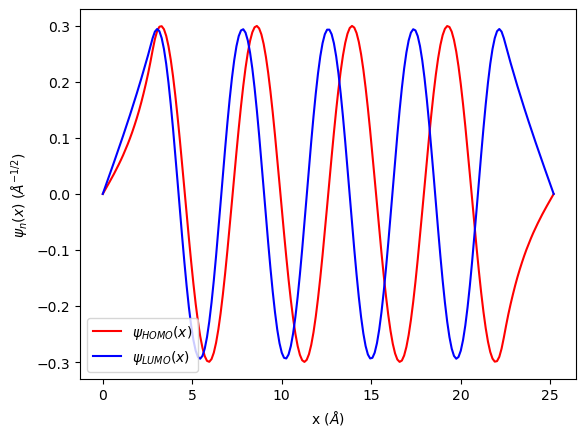

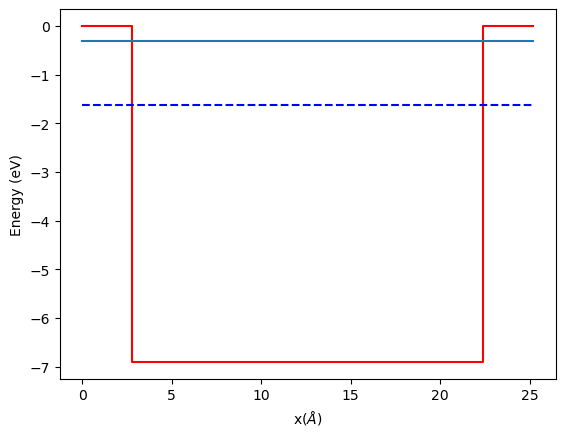

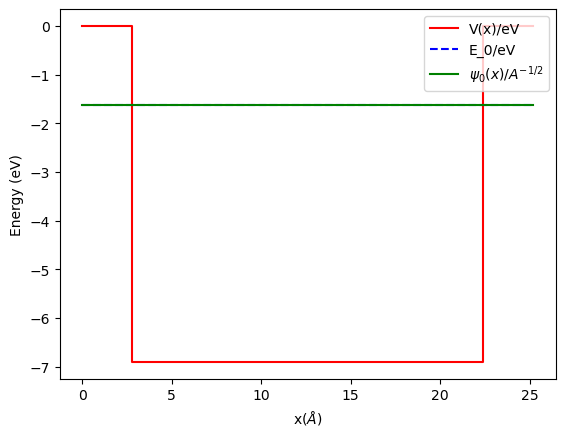

In [2864]:
# plot the ground state solution
plt.plot( x_plot , HOMO_plot, 'r-' , x_plot , LUMO_plot , 'b-')
plt.xlabel('x ($\AA$)')
plt.ylabel('$\psi_n(x)$ ($\AA^{-1/2})$')
plt.legend( [ '$\psi_{HOMO}(x)$' , '$\psi_{LUMO}(x)$' ] )
plt.savefig('WF.png')
plt.show()

#just for thee heck of it, let's also plot the energy levels with the potential
# NOTE: This requires that N>= 5
pot_extend_factor = 1.1
pot_max = pot_extend_factor * max( max ( V1 , VB ) , convert_units( eig_vals[ 4 ] , 'au2eV' ) )
x_pot   = np.array( [ 0.0     , 0.0 , W1 , W1 , W1 + WB , W1 + WB , L   , L ] )
y_pot   = np.array( [ pot_max , V1  , V1 , VB , VB      , 0.0     , 0.0 , pot_max ] )

# arrays for plotting energy levels
x_ene   = np.zeros( [ 2 , 5 ] )
y_ene   = np.zeros( ( 2 , 5 ) )

for i in range( 2 ):

    x_ene[ 1 , i ] = L
    x_ene[ 0 , i ] = 0.0
    state_index = n_H_ + i
    state_energy = convert_units( eig_vals[ state_index ] , 'au2eV' )
    d_i = d_i + 1
    
        
    y_ene[ : , i ] = state_energy 

plt.plot(x_pot, y_pot, 'r-', x_ene[ : , 0 ] , y_ene[ : , 0 ] , 'b--' , x_ene[ : , 1 ] , y_ene[ : , 1 ] )
#, 'b--' , x_ene[ : , 2 ] , y_ene[ : , 2 ] , 'b--' , x_ene[ : , 3 ] , y_ene[ : , 3 ] , 'b--' , x_ene[ : , 4 ] , y_ene[ : , 4 ] , 'b--' ) 
plt.xlabel( 'x($\AA$)' )
plt.ylabel( 'Energy (eV)' )
plt.savefig('potential.png')
plt.show()

plt.plot(x_pot, y_pot, 'r-', x_ene[ : , 0 ] , y_ene[ : , 0 ] , 'b--' , x_plot , ( GS_plot * 0.5 + y_ene[0,0] ) , 'g-'  ) 
plt.xlabel( 'x($\AA$)' )
plt.ylabel( 'Energy (eV)' )
plt.legend(['V(x)/eV','E_0/eV','$\psi_0(x)/A^{-1/2}$'],loc='upper right')
plt.savefig('potential-WF.png')
plt.show()